# Installation

In [1]:
!pip install pandas
!pip install opencv-python==4.6.0.66
!pip install seaborn
!pip install scikit-learn

# Import

In [2]:
import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('C:/Users/Admin/Downloads/Thesis Code/AutismDataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, Sequential
from tensorflow.keras import optimizers

from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0001.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0002.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0003.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0004.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0005.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0006.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0007.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0008.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0009.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0010.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0011.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0012.jpg
C:/Users/Admin/D

# Train & Test Directories 

In [3]:
train_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/train"
test_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/test"

# Splitting Autistic & Non-Autistic

In [4]:
train_non_autistic = []
train_autistic = []

for i in os.listdir(train_data):
    if 'Non_Autistic' in i:
        train_non_autistic.append(os.path.join(train_data, i))
    else:
        train_autistic.append(os.path.join(train_data, i))

test_non_autistic = []
test_autistic = []

for i in os.listdir(test_data):
    if 'Non_Autistic' in i:
        test_non_autistic.append(os.path.join(test_data, i))
    else:
        test_autistic.append(os.path.join(test_data, i))

In [5]:
train_imgs = train_autistic + train_non_autistic
random.shuffle(train_imgs)

In [6]:
test_imgs = test_autistic + test_non_autistic
random.shuffle(test_imgs)

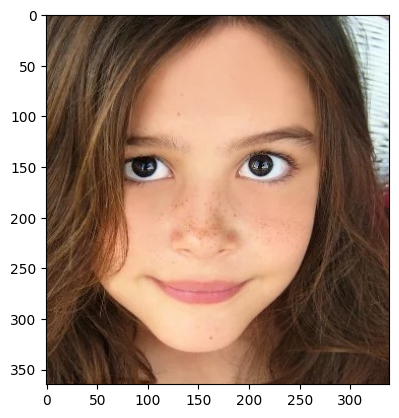

In [7]:
import matplotlib.image as mpimg
for ima in train_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

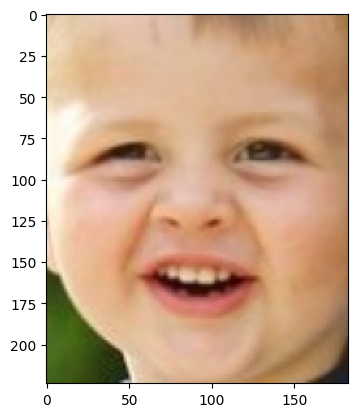

In [8]:
import matplotlib.image as mpimg
for ima in test_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Resizing The Images

In [9]:
def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (224, 224), interpolation = cv2.INTER_CUBIC))
        if 'Non_Autistic' in image:
            y.append(0)
        else:
            y.append(1)
            
    return X,y

X_train, y_train = read_and_process_image(train_imgs)
X_test, y_test = read_and_process_image(test_imgs)


# Validation Data

In [10]:
val_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic"
val_non_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic"
val_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic/{}".format(i) for i in os.listdir(val_autistic)]
val_non_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic/{}".format(i) for i in os.listdir(val_non_autistic)]
val_imgs = val_autistic_imgs + val_non_autistic_imgs
random.shuffle(val_imgs)

In [11]:
X_val, y_val = read_and_process_image(val_imgs)

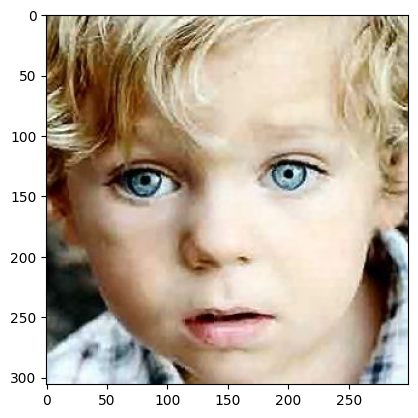

In [12]:
import matplotlib.image as mpimg
for ima in val_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Shape Of Data

In [13]:
# print("Shape of Train images:", X_train.shape)
# print("Shape of Train labels:", y_train.shape)
# print("Shape of validation images:", X_val.shape)
# print("Shape of validation labels:", y_val.shape)

# Preprocessing 

In [15]:
# Define a function for image preprocessing
def preprocess_image(train_data, target_size=(224, 224), grayscale=False):
    image = cv2.imread(train_data, cv2.IMREAD_COLOR)
    
    if grayscale:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    if target_size:
        image = cv2.resize(image, target_size, interpolation=cv2.INTER_CUBIC)
    
    #Normalize pixel values
    image = image / 255.0
    
    return image

# Preprocess training and validation data
X_train = [preprocess_image(train_data) for train_data in train_imgs]
X_test = [preprocess_image(test_data) for test_data in test_imgs]
X_val = [preprocess_image(val_data) for val_data in val_imgs]



# Converting Train & Val Data To np Array


In [16]:
X_val = np.array(X_val)
y_val = np.array(y_val)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Data Augmentation

In [17]:
# Generating Larger DataSet
## Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=4,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)


# Feature Extraction (vgg16,vgg19,mobilenet,xception,efficentnet)

In [18]:
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications import Xception, VGG19, MobileNet, VGG16, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.feature_selection import SelectKBest

# Assuming you have X_train, X_val, y_train_encoded, and y_val_encoded from your previous code

# Define a function for feature extraction using a pre-trained model
def extract_features(model, X_data):
    base_model = model(weights='imagenet', include_top=False)
    model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

    features = []
    for img in X_data:
        img = np.expand_dims(img, axis=0)
        features.append(model.predict(img))

    return np.vstack(features)

# Define the models
models = [Xception, VGG19, MobileNet, VGG16, EfficientNetB0]

# Initialize lists to store extracted features
X_train_features = []
X_val_features = []
X_test_features = []

# Extract features using each model
for model in models:
    X_train_features.append(extract_features(model, X_train))
    X_val_features.append(extract_features(model, X_val))
    X_test_features.append(extract_features(model, X_test))

# Convert lists to numpy arrays
X_train_features = np.concatenate(X_train_features, axis=1)
X_val_features = np.concatenate(X_val_features, axis=1)
X_test_features = np.concatenate(X_test_features, axis=1)

# Standardize the features
scaler = StandardScaler()
X_train_features_std = scaler.fit_transform(X_train_features)
X_val_features_std = scaler.transform(X_val_features)
X_test_features_std = scaler.fit_transform(X_test_features)




1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step


# ANOVA Analysis

In [19]:
# Perform ANOVA analysis
k_best = SelectKBest(f_classif, k='all')

X_train_selected = k_best.fit_transform(X_train_features_std, y_train)
X_test_selected = k_best.fit_transform(X_test_features_std, y_test)
X_val_selected = k_best.transform(X_val_features_std)

# Print selected features
selected_features_indices = np.where(k_best.get_support())[0]
print("Selected Features Indices:", selected_features_indices)


Selected Features Indices: [   0    1    2 ... 5373 5374 5375]


# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
logreg = LogisticRegression(random_state=42,max_iter=1000)

# Train Model

In [23]:
# Train the logistic regression model
history = logreg.fit(X_train_selected, y_train)

# Save Model

In [24]:
pip install joblib

In [25]:
import joblib

# Save the trained model to a file
joblib.dump(logreg, 'logistic_regression_model.joblib')

# Load the saved model
loaded_model = joblib.load('logistic_regression_model.joblib')

In [27]:

# Make predictions on the validation set
predictions = loaded_model.predict(X_val_selected)

# Evaluate accuracy
accuracy = accuracy_score(y_val, predictions)
print("Logistic Regression Validation Accuracy:", accuracy*100)



Logistic Regression Validation Accuracy: 80.0


In [28]:
# Predict on the test set using the loaded model
predictions = loaded_model.predict(X_test_selected)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Logistic Regression Test Accuracy:", accuracy*100)

Logistic Regression Test Accuracy: 88.33333333333333


# Memory Release

In [29]:
import gc

In [30]:
del X_train_features, X_val_features, X_train, X_val
gc.collect()  

26159

# Training And Val Loss

In [42]:
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=history_df.loc[:, ["loss", "val_loss"]], palette=['b', 'r'], dashes=False)
# sns.set_style("whitegrid")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training and Validation Loss")

## Classification Report

In [45]:
# cl_report = classification_report(y_test, predictions)
# print(cl_report)

## Confusion Matrix 

In [46]:
# cn_matrix= confusion_matrix(y_test, predictions)
# cn_matrix

## Plotting the True Positives, True Negatives, False Positives and False Negatives 

In [47]:
# # Plotting the True Positives, True Negatives, False Positives and False Negatives from model's predictions
# f, ax = plt.subplots(figsize = (8,6))
# ax = sns.heatmap(cn_matrix, annot=True)
# ax.set_xlabel("Predicted")
# ax.set_ylabel("True")
# ax.set_title("Confusion Matrix")